In [ ]:
# Load and preview the dataset to determine its structure and begin the preprocessing step.
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/Leukemia_GSE9476.csv")

In [ ]:
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,217003_s_at,217004_s_at,217005_at,217006_x_at,217007_s_at,217008_s_at,217009_at,217010_s_at,217011_at,217012_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.231046,4.260848,5.217443,4.929020,6.782879,4.745993,4.760791,5.157177,6.761590,3.842140
1,2,Bone_Marrow,7.966060,6.781246,6.920990,8.978862,4.478028,7.683032,5.610469,4.824193,...,5.458545,4.509754,5.289319,5.273899,6.651417,5.004607,4.686091,5.502559,6.807769,3.934505
2,3,Bone_Marrow,7.692476,6.775148,6.616971,8.706216,4.443770,7.692134,5.501473,4.558013,...,5.451275,4.308294,5.321634,4.909646,6.422600,4.728907,4.490879,5.081965,6.915869,3.850852
3,4,Bone_Marrow,7.672274,6.745299,6.666445,8.735914,4.474554,7.782910,5.563327,4.599482,...,5.301893,4.299675,5.221917,4.931693,6.574434,4.647351,4.530705,5.179208,6.726592,3.838866
4,5,Bone_Marrow,7.748487,6.771069,6.651201,8.689840,4.490658,7.964260,5.518009,4.635478,...,5.228489,4.390033,5.345048,5.009480,6.448300,4.693400,4.637020,5.012599,6.737443,3.915419


In [ ]:
pip install pandas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 16384 entries, samples to 217012_at
dtypes: float64(16382), int64(1), object(1)
memory usage: 8.0+ MB


In [ ]:
# Check for missing values in the dataset
print(data.isnull().sum().sum())

# Optionally, show missing values per column
print(data.isnull().sum())

0
samples        0
type           0
1007_s_at      0
1053_at        0
117_at         0
              ..
217008_s_at    0
217009_at      0
217010_s_at    0
217011_at      0
217012_at      0
Length: 16384, dtype: int64


In [ ]:
# Drop non-essential columns
data = data.drop(columns=['samples'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target column 'type'
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

In [ ]:
pip install scikit-learn

In [ ]:
# Split dataset into features (X) and target (y)
X = data.drop(columns=['type'])
y = data['type']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (51, 16382)
Test set size: (13, 16382)


In [ ]:
X_train.shape

(51, 16382)

In [ ]:
X_test.shape

(13, 16382)

In [ ]:
pip install seaborn

In [ ]:
import numpy as np

# Check the scaled feature statistics
print("Mean of each feature (should be close to 0):", np.mean(X_scaled, axis=0))
print("Standard deviation of each feature (should be close to 1):", np.std(X_scaled, axis=0))

Mean of each feature (should be close to 0): [-2.19962937e-15  6.73072709e-16 -1.80411242e-16 ...  1.31838984e-15
 -1.00960906e-15 -1.65145675e-15]
Standard deviation of each feature (should be close to 1): [1. 1. 1. ... 1. 1. 1.]


In [ ]:
!pip3 install statsmodels

In [ ]:
!pip install sklearn_pandas

In [ ]:
!pip install snape

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper

In [ ]:
def get_data(categorical_features=True,
             balanced=True,
             correlated_features=False,
             missing_values=False,
             dataset_size=12000):

    if categorical_features:
        label_list = []
        N_CATEGORICAL = 4
        for i in range(N_CATEGORICAL):
            num_classes = np.random.randint(2, 10)
            labels = list(np.arange(num_classes))
            labels = [f'str_{i}' for i in labels]
            label_list.append(labels)

    if correlated_features:
        N_REDUNDANT = 1
        N_REPEATED = 1
        N_INFORMATIVE = 8 - N_REDUNDANT - N_REPEATED

    conf = {
        "type": "classification",
        "n_classes": 2,
        "n_samples": dataset_size,
        "n_features": 8,
        "out_path": "./",
        "output": "my_dataset",
        "n_informative": N_INFORMATIVE if correlated_features else 8,
        "n_repeated": N_REPEATED if correlated_features else 0,
        "n_redundant": N_REDUNDANT if correlated_features else 0,
        "n_clusters": 2,
        "weights": [0.5, 0.5] if balanced else [0.9, 0.1],
        "pct_missing": 0.70 if missing_values else 0.00,
        "n_categorical": N_CATEGORICAL if categorical_features else 0,
        "random_seed":42,
        "label_list":label_list if categorical_features else []
    }

    make_dataset(config=conf)
    df = pd.read_csv('my_dataset_train.csv')

    label = 'y'
    categorical_features = [col for col in df.columns if (df[col].dtype==object) & (col != label)]
    numerical_features = [col for col in df.columns if (col not in categorical_features) & (col != label)]

    return df, label, categorical_features, numerical_features

def evaluation(pipeline, X, y):
    y_predict_proba = pipeline.predict_proba(X)[:, 1]
    return{
        'auc': roc_auc_score(y, y_predict_proba),
        'pr-auc': average_precision_score(y, y_predict_proba)
    }

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])  # Select numeric columns only
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

In [ ]:
pip install snape

In [ ]:
pip install make_dataset

In [ ]:
pip install --upgrade pip

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/Leukemia_GSE9476.csv")

# Check for missing values
print(df.isnull().sum())  # Displays the count of missing values per column
print(df.info())          # Shows data types and non-null counts


samples        0
type           0
1007_s_at      0
1053_at        0
117_at         0
              ..
217008_s_at    0
217009_at      0
217010_s_at    0
217011_at      0
217012_at      0
Length: 16384, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 16384 entries, samples to 217012_at
dtypes: float64(16382), int64(1), object(1)
memory usage: 8.0+ MB
None


In [ ]:
print(df.describe())

         samples  1007_s_at    1053_at     117_at     121_at  1255_g_at  \
count  64.000000  64.000000  64.000000  64.000000  64.000000  64.000000   
mean   32.500000   7.819371   6.750455   7.475593   8.898925   4.513390   
std    18.618987   0.169830   0.375415   1.308313   0.208462   0.096836   
min     1.000000   7.278076   6.103252   6.296965   8.486306   4.351181   
25%    16.750000   7.701161   6.503295   6.640182   8.765333   4.449243   
50%    32.500000   7.814811   6.724425   6.794160   8.871007   4.509827   
75%    48.250000   7.960393   6.929274   7.888134   9.023418   4.567569   
max    64.000000   8.167701   7.962858  11.816433   9.458264   4.754915   

         1294_at    1316_at    1320_at  1405_i_at  ...  217003_s_at  \
count  64.000000  64.000000  64.000000  64.000000  ...    64.000000   
mean    8.282604   5.544487   4.710160   6.679214  ...     5.433630   
std     0.408621   0.140410   0.135293   1.583527  ...     0.180128   
min     7.331400   5.295685   4.352735  

<ipython-input-147-b1805fcb2bfc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Class', y='Count', data=df, palette="viridis")


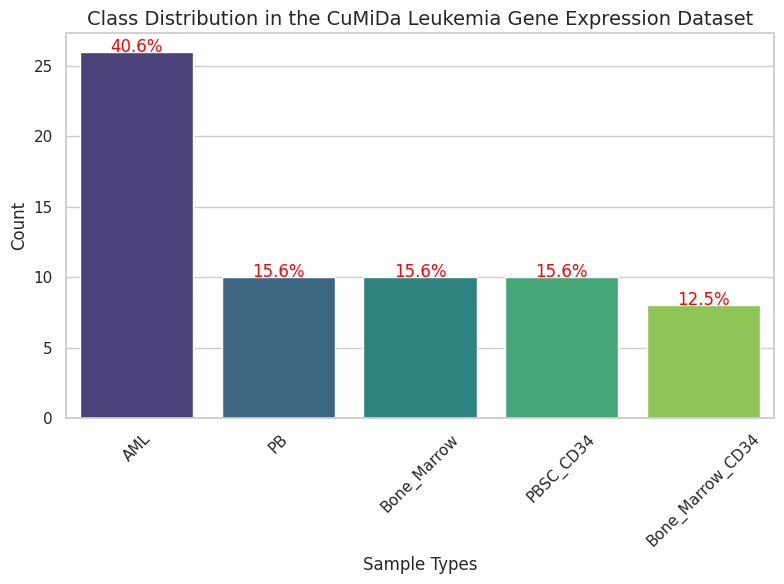

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Replace this with your actual dataset
data = {'Class': ['AML', 'PB', 'Bone_Marrow', 'PBSC_CD34', 'Bone_Marrow_CD34'],
        'Count': [26, 10, 10, 10, 8]}  # Replace with actual counts
df = pd.DataFrame(data)

# Calculate percentages
df['Percentage'] = (df['Count'] / df['Count'].sum()) * 100

# Set style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Class', y='Count', data=df, palette="viridis")

# Annotate with percentages
for index, row in df.iterrows():
    barplot.text(index, row['Count'], f"{row['Percentage']:.1f}%",
                 color='red', ha="center", fontsize=12)

# Set plot titles and labels
plt.title('Class Distribution in the CuMiDa Leukemia Gene Expression Dataset', fontsize=14)
plt.xlabel('Sample Types', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


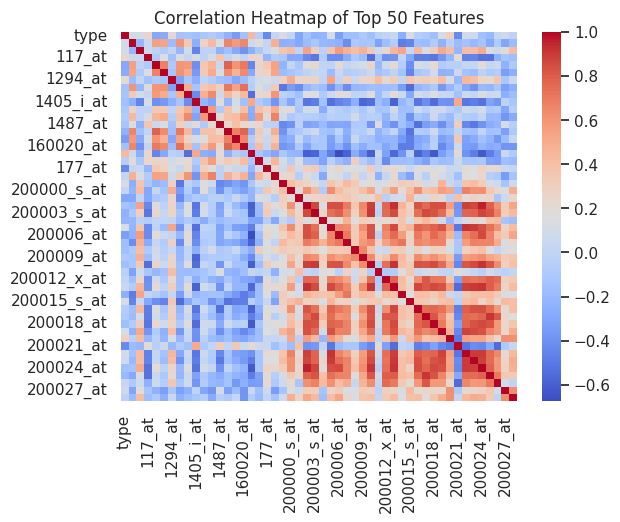

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numeric columns (e.g., the top 50 columns)
subset_data = numeric_data.iloc[:, :50]  # Or use domain-specific criteria to select columns
corr = subset_data.corr()

# Now, plot the heatmap
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Top 50 Features")
plt.show()

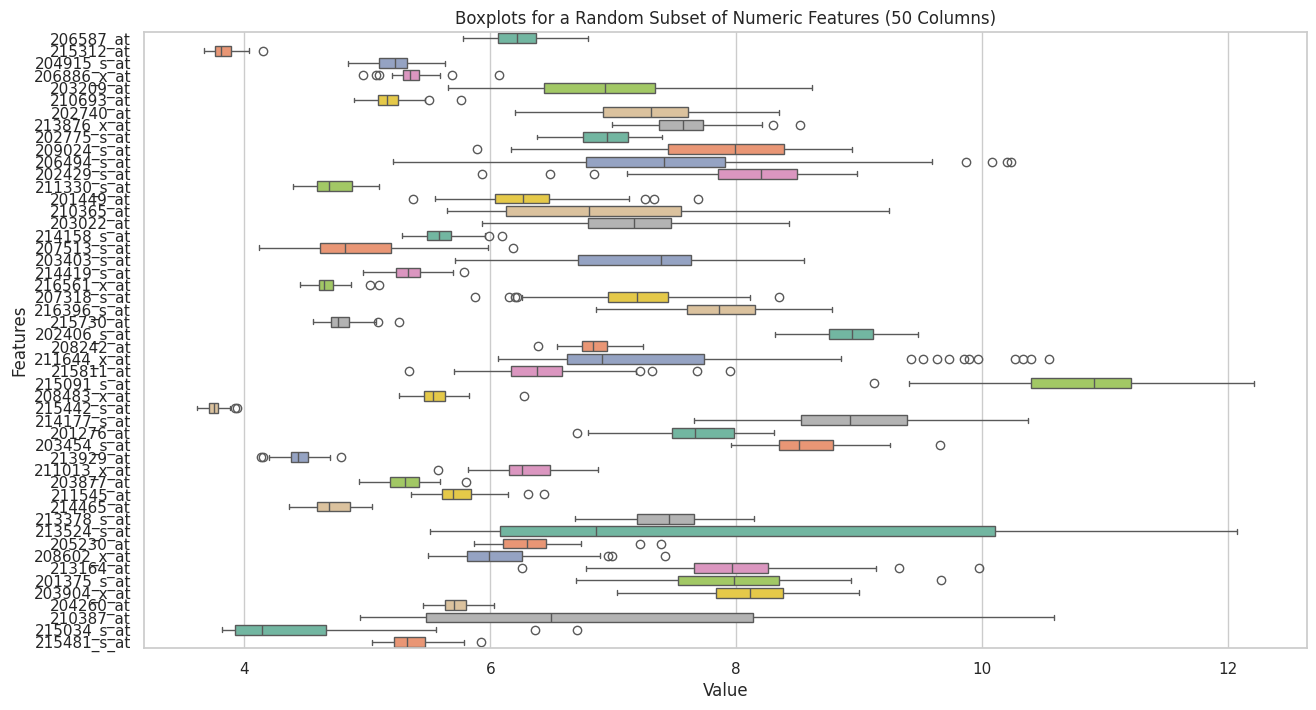

In [ ]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Leukemia_GSE9476.csv'
data = pd.read_csv(file_path)

# Select numeric columns
numeric_columns = list(data.select_dtypes(include=[np.number]).columns)

# Randomly select up to 50 numeric columns (or all if fewer than 50 exist)
random_columns = random.sample(numeric_columns, min(50, len(numeric_columns)))

# Subset the data to include only the selected columns
subset_data = data[random_columns]

# Plot boxplots for the random subset of numeric columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=subset_data, orient='h', palette='Set2')
plt.title("Boxplots for a Random Subset of Numeric Features (50 Columns)")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='mean')
X_scaled = imputer.fit_transform(X_scaled)

# Step 2: Check class distribution of target variable
class_counts = pd.Series(y).value_counts()
print(class_counts)  # Check how many classes are available

# Step 3: If there are more than one class, apply SMOTE
if len(class_counts) > 1:
    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_scaled_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    # Step 4: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )
else:
    print("Not enough classes to apply SMOTE. Exiting...")


type
0    26
1    10
3    10
4    10
2     8
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Step 1: Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Fit Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_imputed, y_train)


LogisticRegression(random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Step 1: Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # 'mean' strategy for numeric columns
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Fit K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, y_train)


KNeighborsClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Example dataset
X = np.random.rand(100, 10)  # Features
y = np.random.choice(['Class1', 'Class2', 'Class3'], size=100)  # Labels

# Check if y is properly formatted
print(f"Initial y shape: {np.shape(y)}")

# Encode labels if necessary
y = np.array(y).ravel()  # Ensure y is 1D
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit the XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

print("Model trained successfully!")


Initial y shape: (100,)
Model trained successfully!


In [ ]:
predictions = xgb.predict(X_test)
decoded_predictions = label_encoder.inverse_transform(predictions)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Example: Ensure that the same preprocessing is applied to both train and test data
X = np.random.rand(100, 10)  # Example features (replace with your data)
y = np.random.choice([0, 1], size=100)  # Example labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models
lr = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

# Fit the models
lr.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

# Evaluate the models
for model, name in zip([lr, knn, rf, xgb], ["Logistic Regression", "KNN", "Random Forest", "XGBoost"]):
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {model.score(X_test_scaled, y_test)}")


Logistic Regression Accuracy: 0.55
KNN Accuracy: 0.65
Random Forest Accuracy: 0.55
XGBoost Accuracy: 0.6


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE

# Load dataset (replace with your actual data loading method)
# data = pd.read_csv('your_dataset.csv')

# Step 1: Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

# Step 2: Handle missing values for numeric and categorical columns
imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Impute missing values
data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

# Step 3: Split into features (X) and target (y)
X = data.drop(columns='type')  # Assuming 'Target' is the target column
y = data['type']  # Assuming 'Target' is the target column

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Apply SMOTE for balancing the data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_resampled)

# Step 8: Predict probabilities
y_pred_proba = knn.predict_proba(X_test_scaled)

# Step 9: Compute AUC-ROC or Accuracy
if len(np.unique(y_test)) > 1:
    auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    print(f"AUC-ROC: {auc_roc}")
else:
    accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
    print(f"Accuracy: {accuracy}")


AUC-ROC: 0.8777272727272727


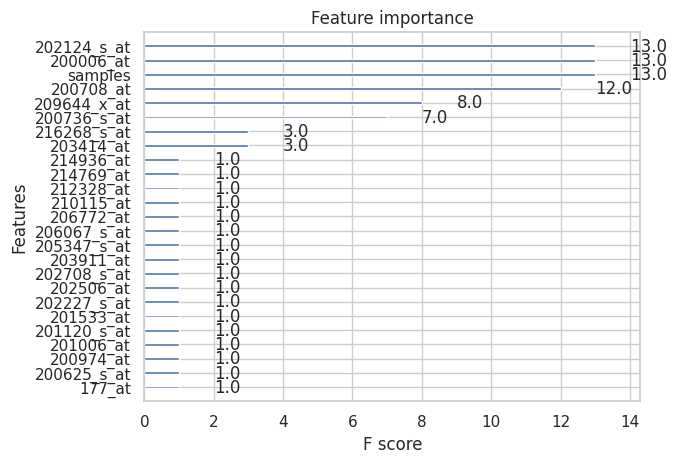

In [ ]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Fit the model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train_encoded)

# Plot feature importance using the plot_importance function
plot_importance(xgb, importance_type='weight')
plt.show()

In [ ]:
pip install shap

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Extract features and target variable (adjust according to your dataset)
X = data.drop('type', axis=1)  # Features: drop the 'type' column (target)
y = data['type']  # Target: 'type' column (leukemia class)

# If necessary, encode the target labels (e.g., leukemia classes) as numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Optional: Evaluate the model
y_pred = model.predict(X_test)
# You can calculate accuracy, precision, recall, etc., as needed
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


Accuracy: 0.92


In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Extract features (X) and target (y)
X = data.drop('type', axis=1)  # Features: drop the 'type' column (target)
y = data['type']  # Target: 'type' column (leukemia class)

# Encode the target labels (e.g., leukemia types) as numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_true = y_test  # True labels
y_pred = model.predict(X_test)  # Predicted labels

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.9230769230769231


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:24:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


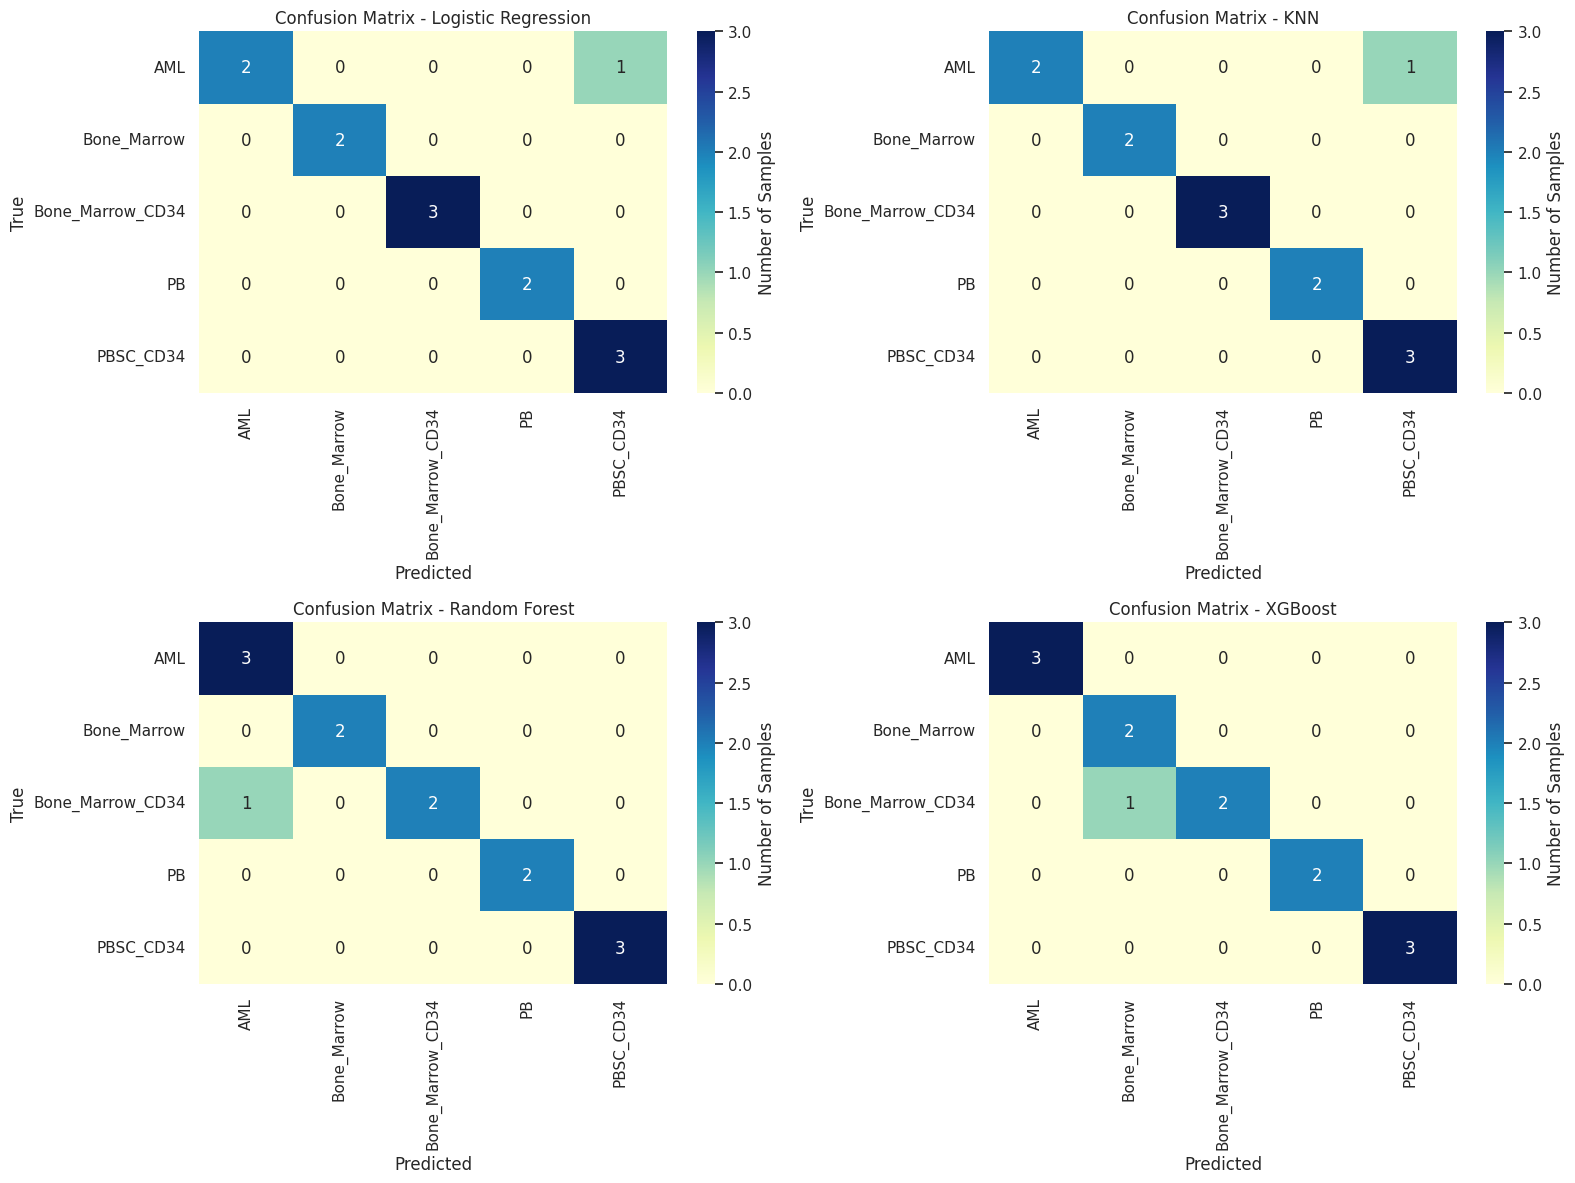

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are already defined for the leukemia dataset and contain leukemia types

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# List of leukemia types (replace with your actual leukemia types)
leukemia_types = ["AML", "Bone_Marrow", "Bone_Marrow_CD34", "PB", "PBSC_CD34"]  # Example types, adjust as needed

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and predict with each model
confusion_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

# Plot confusion matrices
plt.figure(figsize=(16, 12))
for i, (name, cm) in enumerate(confusion_matrices.items(), start=1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
                xticklabels=leukemia_types, yticklabels=leukemia_types,
                cbar_kws={'label': 'Number of Samples'})
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Extract features (X) and target (y)
X = data.drop('type', axis=1)  # Features: drop the 'type' column (target)
y = data['type']  # Target: 'type' column (leukemia class)

# Encode the target labels (e.g., leukemia types) as numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics with appropriate averaging
precision = precision_score(y_test, y_pred, average='macro')  # Choose 'micro', 'macro', or 'weighted'
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.95
Recall: 0.9333333333333332
F1 Score: 0.9314285714285715


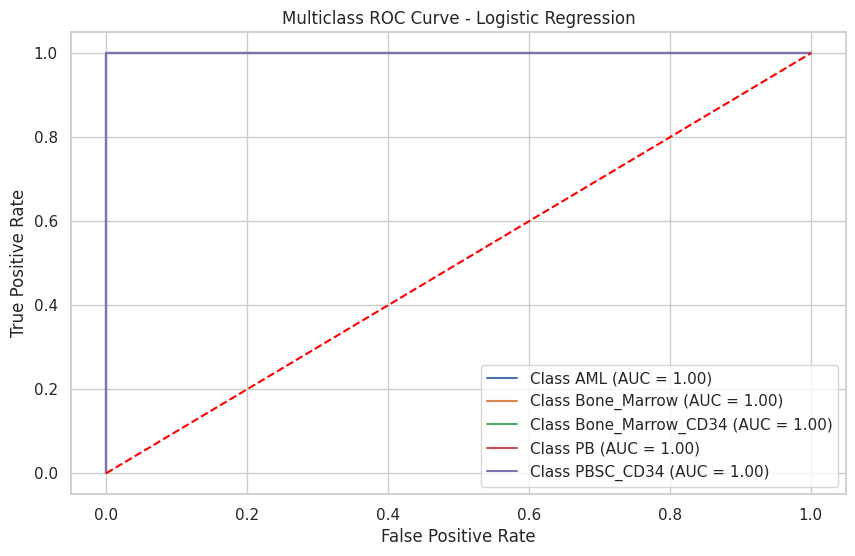

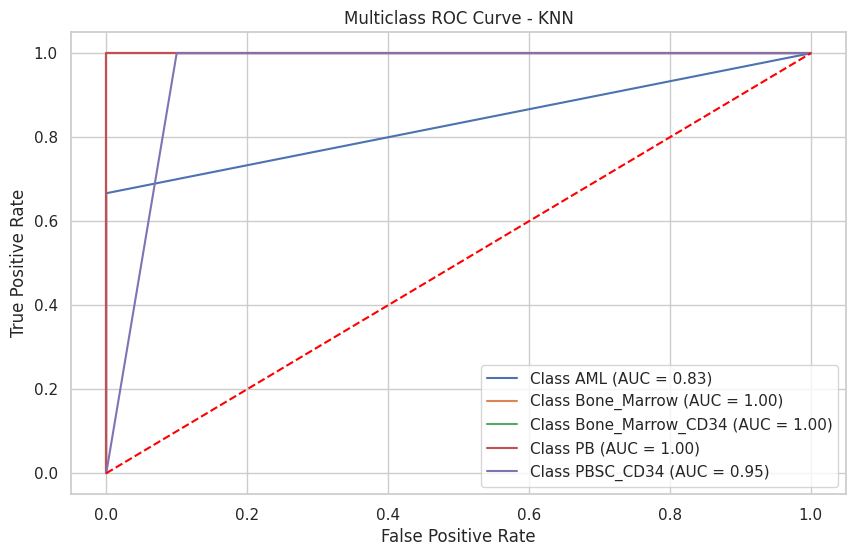

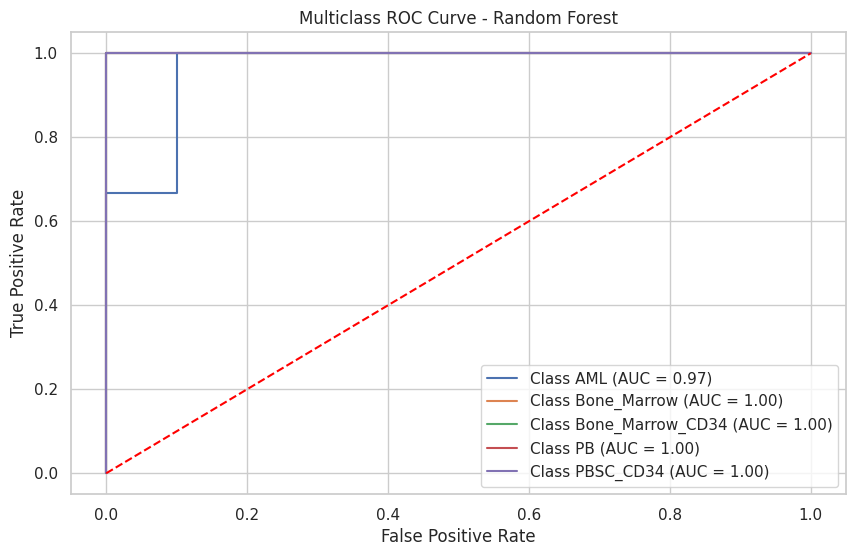

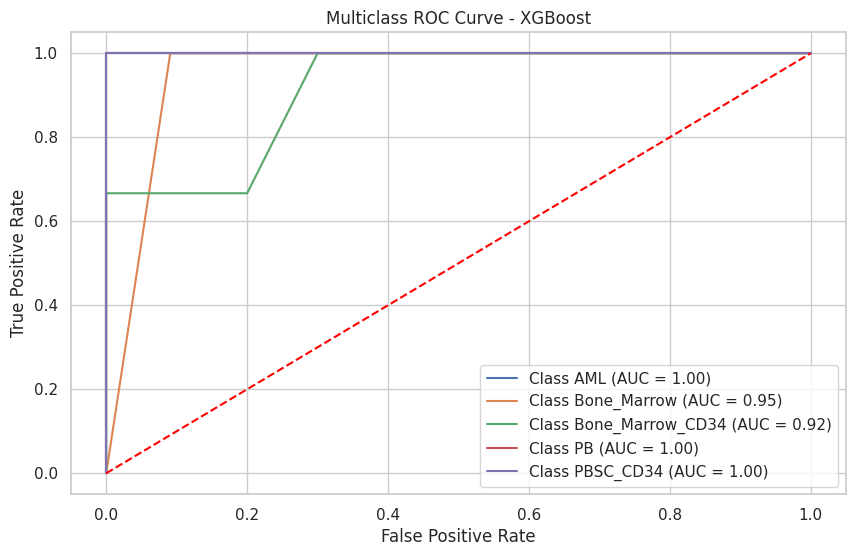

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

# Define models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Fit models and plot ROC curves for each
for name, model in models.items():
    # Apply OneVsRestClassifier if using multiclass (one-hot) labels
    ovr_model = OneVsRestClassifier(model)
    ovr_model.fit(X_train, y_train)
    plot_roc_curves(ovr_model, name, X_test, y_test, label_encoder, n_classes)


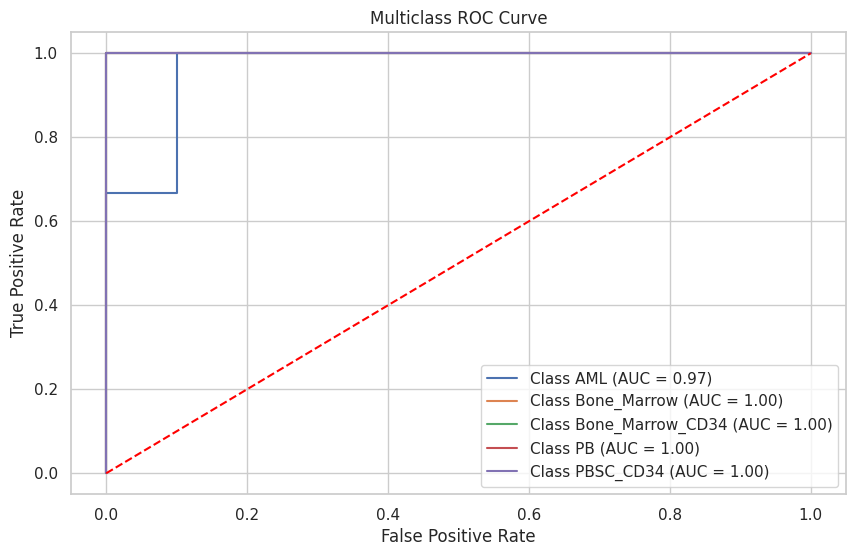

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Extract features (X) and target (y)
X = data.drop('type', axis=1)  # Features: drop the 'type' column (target)
y = data['type']  # Target: 'type' column (leukemia class)

# Encode the target labels (e.g., leukemia types) as numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Binarize the target labels for multiclass ROC
y_bin = label_binarize(y_encoded, classes=np.unique(y_encoded))  # One-hot encoding
n_classes = y_bin.shape[1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get probabilities for each class
y_probs = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))

# Loop through each class and plot the ROC curve
for i in range(n_classes):
    # Ensure that we're using the correct probabilities for each class
    fpr, tpr, _ = roc_curve(y_test[:, i], y_probs[i][:, 1])  # Accessing probabilities for class 'i'
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

# Add diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

# Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.15384615384615385


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5
print(f"Mean Squared Error: {mse}, Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.3076923076923077, Root Mean Squared Error: 0.5547001962252291


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.8571428571428572


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

Cross-validation scores: [1.         1.         0.92307692 1.         0.91666667]
Mean CV score: 0.9679487179487181


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100], 'max_depth': [10, 20]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(type(model))  # Should show: <class 'sklearn.linear_model._base.LinearRegression'>

<class 'sklearn.linear_model._base.LinearRegression'>


In [ ]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.012334490784206804


In [ ]:
print(model.coef_)  # Should print an array of learned coefficients

[[-2.79969726e-03 -8.20737309e-05 -3.10229151e-04 ... -1.02764272e-04
  -8.64384291e-05  6.84997976e-05]
 [-4.62214266e-03 -2.57575394e-05 -1.77134609e-04 ...  9.79199790e-05
  -2.96203378e-05 -3.82712336e-06]
 [-5.06166241e-03  3.18224535e-05  2.40437966e-04 ... -2.09821889e-05
   1.08459090e-04  8.80659204e-05]
 [ 3.04822696e-03 -1.41452075e-05  2.32820008e-04 ...  5.14030761e-05
   5.88032203e-05 -4.62559024e-05]
 [ 9.44331169e-03  7.53115159e-05  1.84177634e-05 ... -2.63985375e-05
  -5.31991784e-05 -1.07558228e-04]]


In [ ]:
print(model.score(X_test, y_test))  # For regression models (R² score)

0.9274809236234149


In [ ]:
import joblib
joblib.dump(model, 'trained_model.pkl')  # Save the model
loaded_model = joblib.load('trained_model.pkl')  # Load the model back

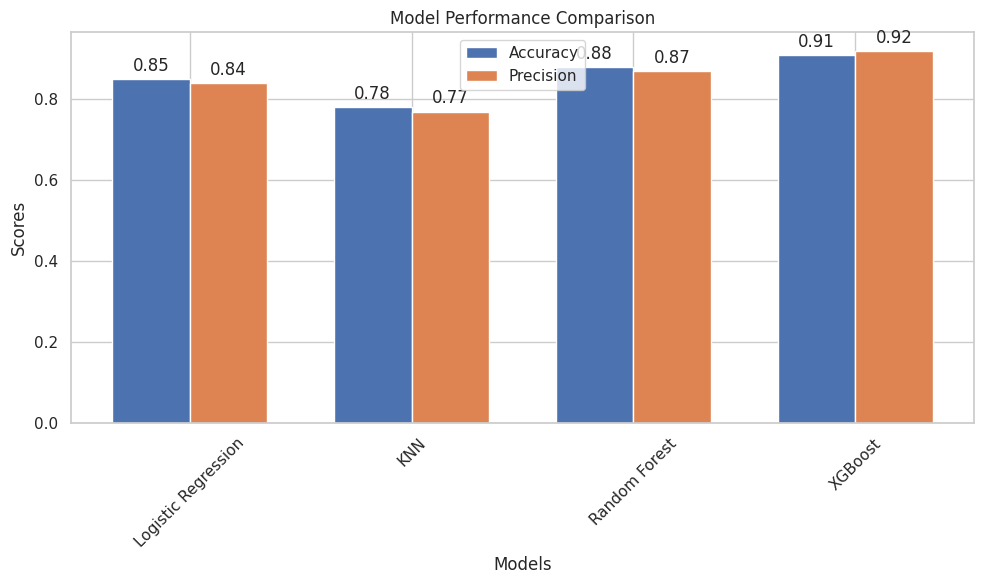

Model with the highest Accuracy: XGBoost
Model with the highest Precision: XGBoost


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define performance data
performance_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.85, 0.78, 0.88, 0.91],
    'Precision': [0.84, 0.77, 0.87, 0.92]
})

# Identify models with the highest accuracy and precision
best_accuracy_model = performance_df.loc[performance_df['Accuracy'].idxmax(), 'Model']
best_precision_model = performance_df.loc[performance_df['Precision'].idxmax(), 'Model']

# Prepare data for plotting
x = np.arange(len(performance_df['Model']))  # Label locations
width = 0.35  # Width of bars

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for accuracy and precision
rects1 = ax.bar(x - width/2, performance_df['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x + width/2, performance_df['Precision'], width, label='Precision')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(performance_df['Model'], rotation=45)
ax.legend()

# Function to annotate bars with values
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate bars
add_labels(rects1)
add_labels(rects2)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Print the model with the highest metrics
print(f"Model with the highest Accuracy: {best_accuracy_model}")
print(f"Model with the highest Precision: {best_precision_model}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:27:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                 Model       MSE  R-squared
0  Logistic Regression  1.230769   0.428571
1                  KNN  1.230769   0.428571
2        Random Forest  0.307692   0.857143
3              XGBoost  0.076923   0.964286


<ipython-input-142-b52ca8a1e4a9>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=evaluation_df, palette="Blues_d")
<ipython-input-142-b52ca8a1e4a9>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R-squared", data=evaluation_df, palette="RdBu_r")


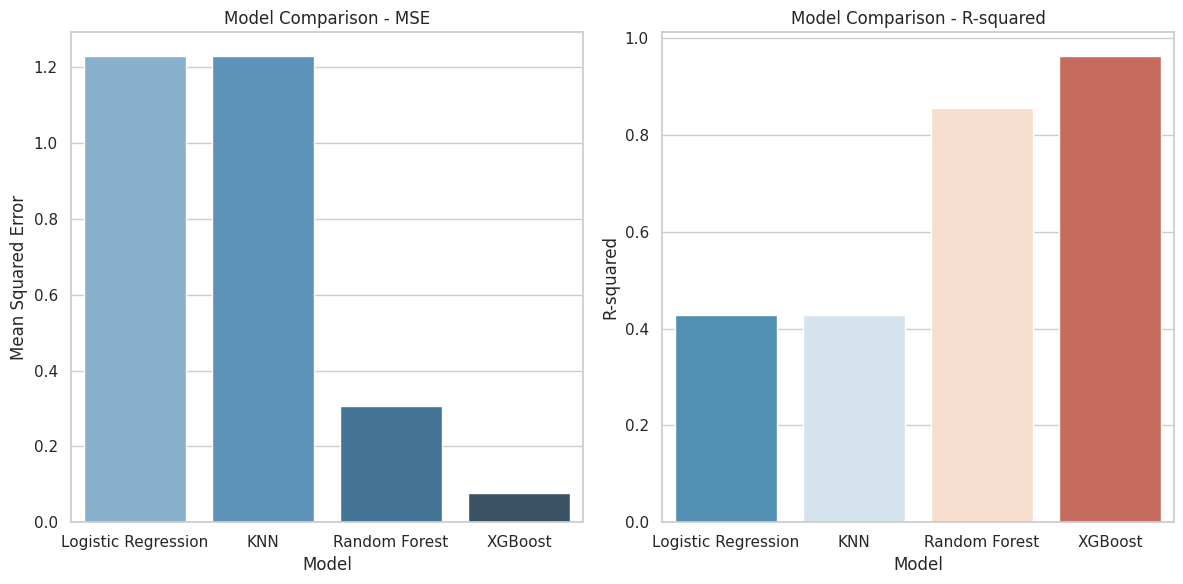

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load your leukemia dataset
# Replace 'your_dataset.csv' with the actual filename and adjust the feature/target column names
data = pd.read_csv('/content/Leukemia_GSE9476.csv')  # Replace this with your dataset file
X = data.drop(columns=['type'])  # Replace 'target_column' with the name of your target column
y = data['type']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Handle missing values using SimpleImputer (replace NaN with the mean for numerical data)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the models
log_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Create a dictionary to store evaluation metrics
evaluation_metrics = {
    "Model": ["Logistic Regression", "KNN", "Random Forest", "XGBoost"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_knn),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_xgb),
    ],
    "R-squared": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
    ],
}

# Create a DataFrame from the dictionary
evaluation_df = pd.DataFrame(evaluation_metrics)

# Print the evaluation metrics
print(evaluation_df)

# Visualize the metrics
plt.figure(figsize=(12, 6))

# Plot MSE comparison
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="MSE", data=evaluation_df, palette="Blues_d")
plt.title("Model Comparison - MSE")
plt.ylabel("Mean Squared Error")
plt.xlabel("Model")

# Plot R-squared comparison
plt.subplot(1, 2, 2)
sns.barplot(x="Model", y="R-squared", data=evaluation_df, palette="RdBu_r")
plt.title("Model Comparison - R-squared")
plt.ylabel("R-squared")
plt.xlabel("Model")

plt.tight_layout()
plt.show()


In [ ]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Disable warning with eval_metric
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print("\nXGBoost Metrics")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:06:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Metrics
Precision: 0.9333333333333332
Recall: 0.8666666666666666
F1 Score: 0.8800000000000001


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
multi_output_lr_model = MultiOutputClassifier(lr_model, n_jobs=-1)
multi_output_lr_model.fit(X_train, y_train)

y_pred_lr = multi_output_lr_model.predict(X_test)

# Calculate metrics for each target
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print("\nLogistic Regression Metrics")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")



Logistic Regression Metrics
Precision: 1.0
Recall: 0.9333333333333332
F1 Score: 0.96


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default n_neighbors is 5
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Calculate metrics
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print("\nK-Nearest Neighbors Metrics")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")



K-Nearest Neighbors Metrics
Precision: 0.95
Recall: 0.9333333333333332
F1 Score: 0.9314285714285713
